In [1]:
# Copyright (c) 2021, S. VenkataKeerthy, Rohit Aggarwal
# Department of Computer Science and Engineering, IIT Hyderabad
#
# This software is available under the BSD 4-Clause License. Please see LICENSE
# file in the top-level directory for more details.
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the file

In [2]:
OOVData = pd.read_csv("./OOV_71_Algos.csv")
filename = OOVData["File"]
NCC_MissCount = OOVData["Datapoints miss (NCC)"]
IR2Vec_MissCount = OOVData["Datapoints miss (IR2Vec)"]

# Generate Graph

/home/venkat/anaconda3/envs/IR2Vec/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


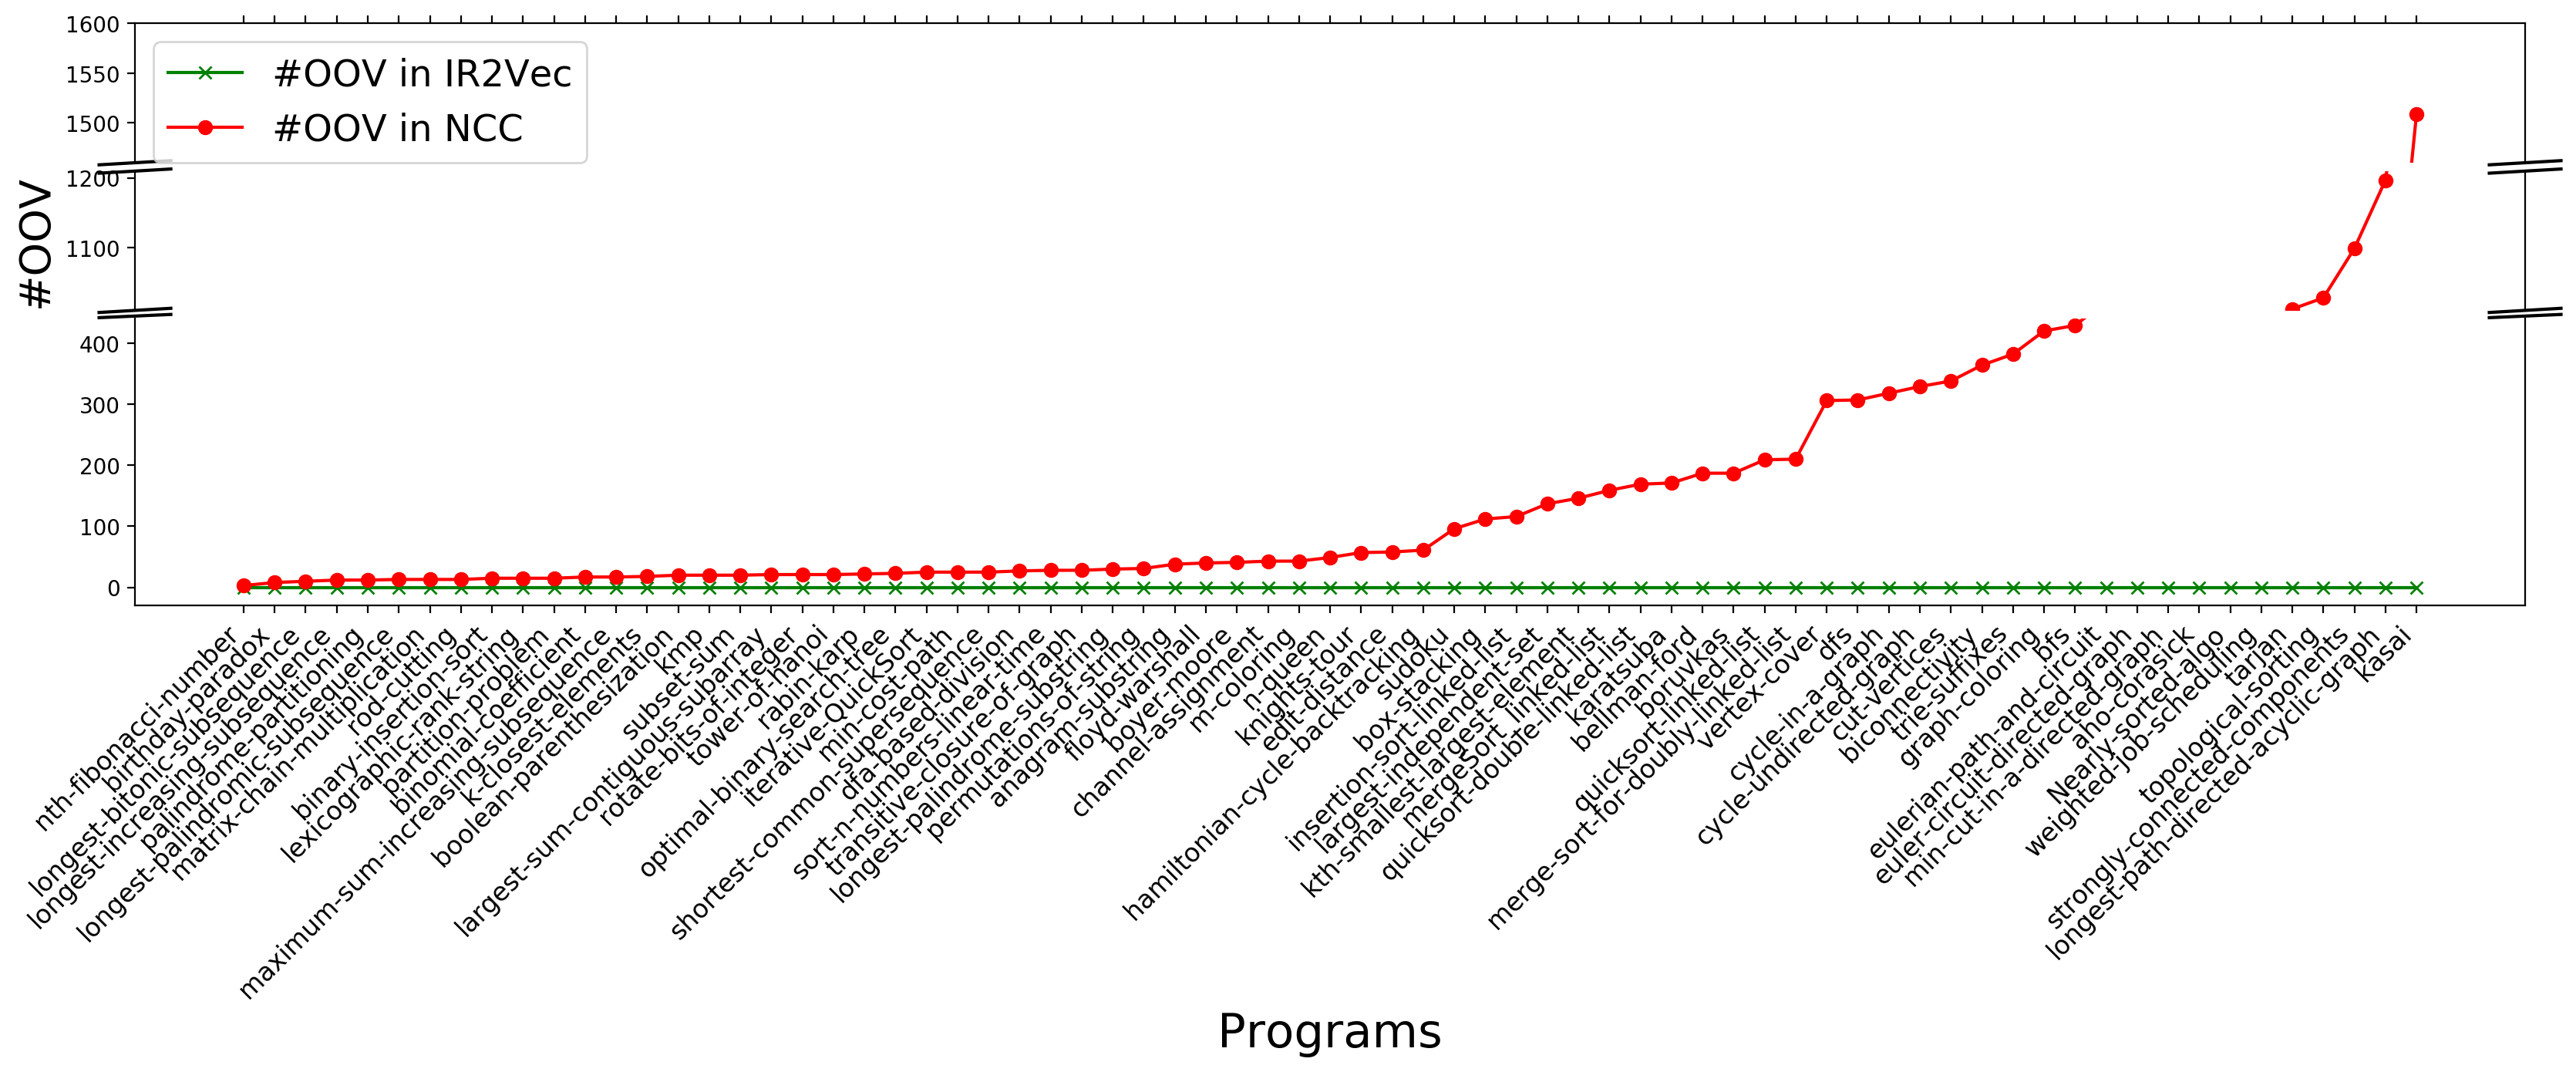

In [3]:
plt.figure(figsize=(20, 5), dpi=200)
grid = plt.GridSpec(4, 1, hspace=0.06)
ax = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[1, 0])
ax3 = plt.subplot(grid[2:4, 0])

ax.plot(filename, IR2Vec_MissCount, color="green", label="#OOV in IR2Vec", marker="x")
ax.plot(filename, NCC_MissCount, color="red", label="#OOV in NCC", marker="o")

ax2.plot(filename, IR2Vec_MissCount, color="green", label="#OOV in IR2Vec", marker="x")
ax2.plot(filename, NCC_MissCount, color="red", label="#OOV in NCC", marker="o")

ax3.plot(filename, IR2Vec_MissCount, color="green", label="#OOV in IR2Vec", marker="x")
ax3.plot(filename, NCC_MissCount, color="red", label="#OOV in NCC", marker="o")

ax.set_ylim(1460, 1600)
ax2.set_ylim(1010, 1210)
ax3.set_ylim(-30, 440)


# hide the spines between ax and ax2
ax.spines["bottom"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop="off")  # don't put tick labels at the top
ax2.xaxis.set_visible(False)
ax3.xaxis.tick_bottom()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs = dict(transform=ax2.transAxes, color="k", clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), ((1 + d / 4), 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 + d / 4, 1 + d), **kwargs)


ax3.set_xticklabels(filename, rotation=45, horizontalalignment="right", fontsize=12)
ax.legend(fontsize="xx-large", loc=2)
ax3.set_xlabel("Programs", fontsize=22)
ax2.set_ylabel("#OOV", fontsize=20)
plt.savefig("71-Programs_OOV.pdf", bbox_inches="tight")